In [143]:
import useful_usage as u
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FormatStrFormatter
import numpy as np


In [144]:
yellow_orginal = u.fetch_data("m6nq-qud6")
yellow_results_df = u.preprocess_data("m6nq-qud6")


In [145]:
yellow_results_df.describe()

,vendorid,passenger_count,trip_distance,pulocationid,dolocationid,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.690100,1.508000,3.100198,158.55510,154.729600,11.882178,0.82593,0.486450,1.784592,2.106250,0.294450,16.969588,2.106250
std,0.462475,1.135458,3.597202,70.93239,75.254116,10.842526,1.11676,0.104127,2.435247,0.956257,0.057048,12.502909,0.956257
min,1.000000,0.000000,0.000000,1.00000,1.000000,-100.000000,-0.50000,-0.500000,-1.070000,-2.500000,-0.300000,-100.300000,-2.500000
25%,1.000000,1.000000,1.040000,100.00000,84.500000,6.000000,0.00000,0.500000,0.000000,2.500000,0.300000,10.300000,2.500000
50%,2.000000,1.000000,1.930000,152.00000,151.000000,8.500000,0.50000,0.500000,1.540000,2.500000,0.300000,13.550000,2.500000
75%,2.000000,2.000000,3.600000,234.00000,234.000000,13.500000,2.50000,0.500000,2.652500,2.500000,0.300000,19.300000,2.500000
max,2.000000,6.000000,45.920000,265.00000,265.000000,121.000000,3.50000,0.500000,80.000000,2.500000,0.300000,137.760000,2.500000


- the trip distance vary between 0 and 56 km
- the duration should be calculated
- the trip´s total amout is between 11.6 and 266.7 $
- the fare´s amount between 6-5 and 200$
- the average of passengers pro trip is 1 and could be max. 6

## Univariate Analysis
Here we take each variable and analyse one by one through seaborn and matplotlib plots

C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCach

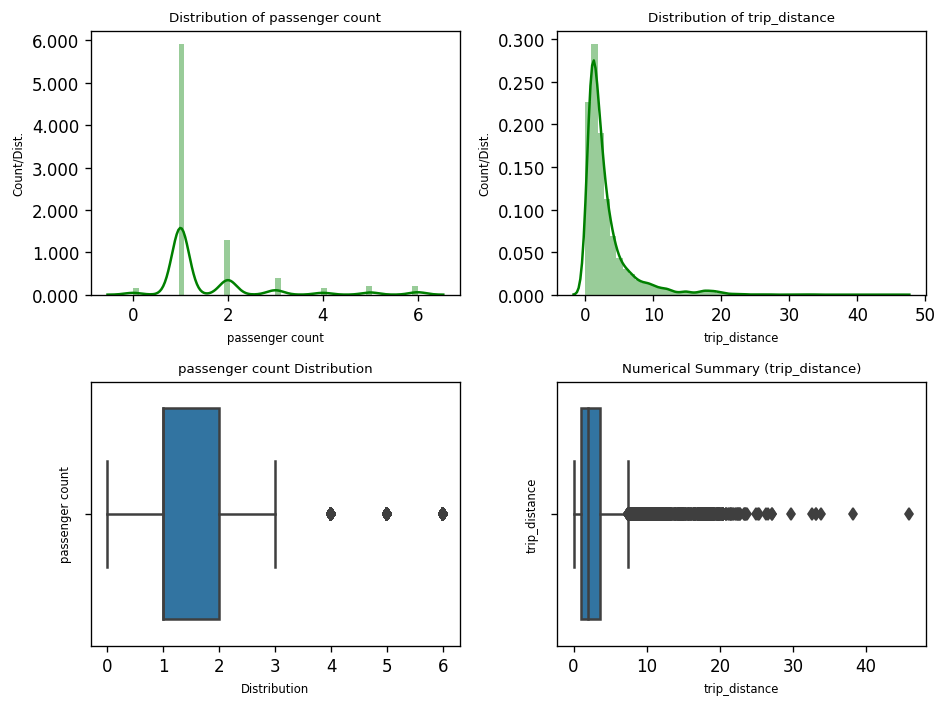

In [146]:
#Setting up the frame 
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

#Distribution of passenger_count with displot
plot00=sns.distplot(yellow_results_df['passenger_count'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of passenger count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('passenger count',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

#Distribution of trip_distance with displot
plot01=sns.distplot(yellow_results_df['trip_distance'],ax=axes[0][1],color='green')
axes[0][1].set_title('Distribution of trip_distance',fontdict={'fontsize':8})
axes[0][1].set_xlabel('trip_distance',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.tight_layout()

#passenger_count-Boxplot
plot10=sns.boxplot(yellow_results_df['passenger_count'],ax=axes[1][0])
axes[1][0].set_title('passenger count Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Distribution',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'passenger count',fontdict={'fontsize':7})
plt.tight_layout()

#trip_distance-Boxplot
plot11=sns.boxplot(yellow_results_df['trip_distance'],ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (trip_distance)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'trip_distance',fontdict={'fontsize':7})
axes[1][1].set_xlabel('trip_distance',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.



## The distribution of Pickup and Drop Off 



#### The distribution of the different days of week

In [147]:
yellow_results_df_days = yellow_results_df.copy()

yellow_results_df_days['tpep_pickup_datetime']=yellow_results_df_days['tpep_pickup_datetime'].dt.day_name()
yellow_results_df_days['tpep_dropoff_datetime']=yellow_results_df_days['tpep_dropoff_datetime'].dt.day_name()


In [148]:
yellow_results_df_days['tpep_pickup_datetime'].value_counts()


Friday      9984
Thursday      16
Name: tpep_pickup_datetime, dtype: int64

In [149]:
yellow_results_df_days['tpep_dropoff_datetime'].value_counts()


Friday      9971
Saturday      20
Thursday       9
Name: tpep_dropoff_datetime, dtype: int64

#### The distribution of Pickup and Drop Off periods of the day

The time part is represented by hours,minutes and seconds which is difficult for the analysis 
thus we divide the times into 4 time zones: 

* morning (4 hrs to 10 hrs)
* midday (10 hrs to 16 hrs) 
* evening (16 hrs to 22 hrs) 
* late night (22 hrs to 4 hrs)



In [150]:

yellow_results_df_inintervals = yellow_results_df.copy()
def timezone(x):
    if x>=dt.time(4, 0, 1) and x <=dt.time(10, 0, 0):
        return 'morning'
    elif x>=dt.time(10, 0, 1) and x <=dt.time(16, 0, 0):
        return 'midday'
    elif x>=dt.time(16, 0, 1) and x <=dt.time(22, 0, 0):
        return 'evening'
    elif x>=dt.time(22, 0, 1) or x <=dt.time(4, 0, 0):
        return 'late night'
    
yellow_results_df_inintervals['tpep_dropoff_datetime']=yellow_results_df_inintervals['tpep_dropoff_datetime'].apply(lambda x :timezone(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
yellow_results_df_inintervals['tpep_pickup_datetime']=yellow_results_df_inintervals['tpep_pickup_datetime'].apply(lambda x :timezone(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


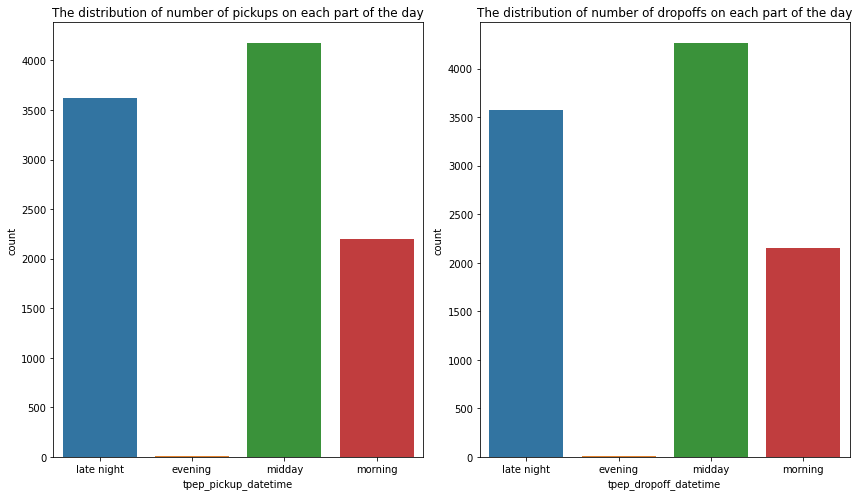

In [151]:
time_order=["morning","midday", "evening", "late night"] 
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,7))
sns.countplot(x='tpep_pickup_datetime',data=yellow_results_df_inintervals,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')

sns.countplot(x='tpep_dropoff_datetime',data=yellow_results_df_inintervals,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()


here we observe that most pickups as well as dropoffs occurs during midday and then in late nights  

### Distribution on hourly basis

Text(0.5, 1.0, 'Distribution of dropoff hours')

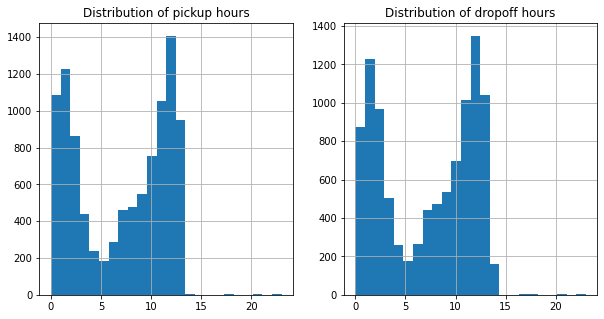

In [152]:
yellow_results_df_hours = yellow_results_df.copy()

figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
yellow_results_df_hours['tpep_pickup_datetime']=yellow_results_df_hours['tpep_pickup_datetime'].dt.hour
yellow_results_df_hours.tpep_pickup_datetime.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
yellow_results_df_hours['dropoff_hour']=yellow_results_df_hours['tpep_dropoff_datetime'].dt.hour
yellow_results_df_hours.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')


The 2 distributions are almost similar and are also aligned with the division of the hours of the day into 4 parts and their distribution done previously.

In [153]:
difference =(yellow_results_df.tpep_dropoff_datetime-yellow_results_df.tpep_pickup_datetime)
difference_seconds=difference.dt.total_seconds()
yellow_results_seconds= yellow_results_df.copy()
yellow_results_seconds= yellow_results_seconds.assign(trip_duration=difference_seconds)
relation_dist_duration=pd.pivot_table(yellow_results_seconds,index=["passenger_count"],
                               values=['trip_duration','trip_distance'],
                               aggfunc=[np.mean,len,np.std])
cm = sns.light_palette("green", as_cmap=True)

relation_dist_duration.style.background_gradient(cmap=cm)

C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

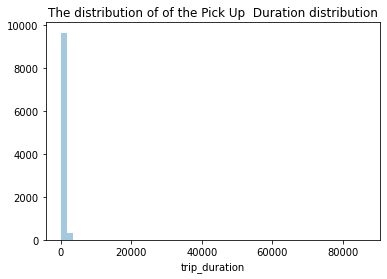

In [154]:
sns.distplot(yellow_results_seconds['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')


This histogram shows extreme right skewness, hence there are outliers. Lets see the boxplot of this variable.



C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

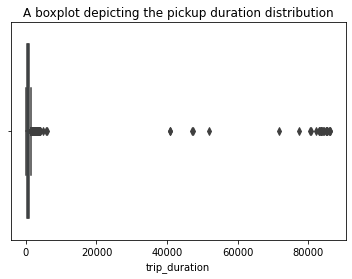

In [155]:
sns.boxplot(yellow_results_seconds['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')


* Here we observe some isolated values from 40000 to 80000 while the majority is less than 10000
* trips with a 0 duration have non sence then we will remove them.

In [156]:
max_outliers = yellow_results_seconds['trip_duration'].nlargest(27)
yellow_results_without_outliers = yellow_results_seconds[yellow_results_seconds.trip_duration< max_outliers.min()]
yellow_results_without_outliers = yellow_results_without_outliers[yellow_results_without_outliers.trip_duration>0]
yellow_results_without_outliers = yellow_results_without_outliers[yellow_results_seconds.trip_duration>0]


C:\Users\aymen\AppData\Local\Temp\ipykernel_21604\4008877515.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yellow_results_without_outliers = yellow_results_without_outliers[yellow_results_seconds.trip_duration>0]


In [157]:
yellow_results_without_outliers

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,1,N,142,43,2,8.0,3.0,0.5,0.00,2.5,0.3,11.80,2.5,362.0
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,1,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,59.0
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,1,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,1656.0
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0,10.60,1,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,913.0
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,1,16.5,0.5,0.5,4.06,2.5,0.3,24.36,2.5,992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,2021-01-01 13:55:14,2021-01-01 13:59:31,1,0.79,1,N,142,239,1,5.5,0.0,0.5,2.64,2.5,0.3,11.44,2.5,257.0
9996,2,2021-01-01 13:37:37,2021-01-01 13:44:01,1,0.75,1,N,161,43,1,6.0,0.0,0.5,1.86,2.5,0.3,11.16,2.5,384.0
9997,2,2021-01-01 13:48:52,2021-01-01 14:05:13,1,3.68,1,N,151,140,2,14.5,0.0,0.5,0.00,2.5,0.3,17.80,2.5,981.0
9998,1,2021-01-01 13:06:50,2021-01-01 13:10:10,1,1.30,1,Y,237,263,1,5.5,2.5,0.5,1.75,2.5,0.3,10.55,2.5,200.0


C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

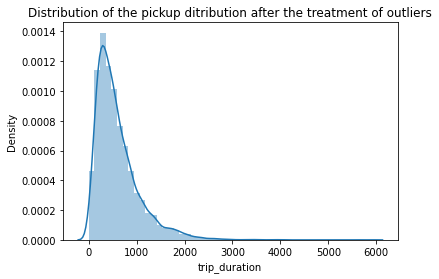

In [158]:
sns.distplot(yellow_results_without_outliers['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')


In [159]:
bins=np.array([0,360,1080,18000])
yellow_duration_without_outliers = yellow_results_without_outliers.copy()
yellow_duration_without_outliers['trip_duration']=pd.cut(yellow_duration_without_outliers.trip_duration,bins,labels=["<1", "2-5",">5"])
yellow_duration_without_outliers['tpep_pickup_datetime']=yellow_results_without_outliers['tpep_pickup_datetime'].dt.day_name()
yellow_duration_without_outliers['tpep_dropoff_datetime']=yellow_results_without_outliers['tpep_dropoff_datetime'].dt.day_name()

yellow_duration_without_outliers

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1,Friday,Friday,1,2.10,1,N,142,43,2,8.0,3.0,0.5,0.00,2.5,0.3,11.80,2.5,2-5
1,1,Friday,Friday,1,0.20,1,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,<1
2,1,Friday,Friday,1,14.70,1,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,>5
3,1,Friday,Friday,0,10.60,1,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,2-5
4,2,Friday,Friday,1,4.94,1,N,68,33,1,16.5,0.5,0.5,4.06,2.5,0.3,24.36,2.5,2-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,Friday,Friday,1,0.79,1,N,142,239,1,5.5,0.0,0.5,2.64,2.5,0.3,11.44,2.5,<1
9996,2,Friday,Friday,1,0.75,1,N,161,43,1,6.0,0.0,0.5,1.86,2.5,0.3,11.16,2.5,2-5
9997,2,Friday,Friday,1,3.68,1,N,151,140,2,14.5,0.0,0.5,0.00,2.5,0.3,17.80,2.5,2-5
9998,1,Friday,Friday,1,1.30,1,Y,237,263,1,5.5,2.5,0.5,1.75,2.5,0.3,10.55,2.5,<1


The relationship between Trip Duration and The day of the week


Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

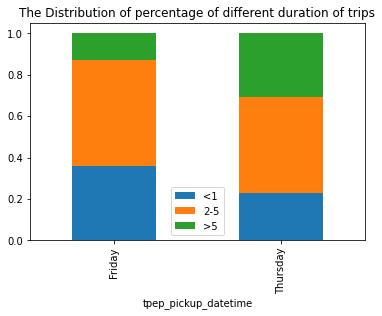

In [160]:
ax1=yellow_duration_without_outliers.groupby('tpep_pickup_datetime')['trip_duration'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')


In [161]:
yellow_results_dayswithout_outliers = yellow_results_without_outliers.copy()
yellow_results_dayswithout_outliers['tpep_pickup_datetime']=yellow_results_without_outliers['tpep_pickup_datetime'].dt.day_name()
yellow_results_dayswithout_outliers['tpep_dropoff_datetime']=yellow_results_without_outliers['tpep_dropoff_datetime'].dt.day_name()
yellow_results_dayswithout_outliers

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1,Friday,Friday,1,2.10,1,N,142,43,2,8.0,3.0,0.5,0.00,2.5,0.3,11.80,2.5,362.0
1,1,Friday,Friday,1,0.20,1,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,59.0
2,1,Friday,Friday,1,14.70,1,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,1656.0
3,1,Friday,Friday,0,10.60,1,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,913.0
4,2,Friday,Friday,1,4.94,1,N,68,33,1,16.5,0.5,0.5,4.06,2.5,0.3,24.36,2.5,992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,Friday,Friday,1,0.79,1,N,142,239,1,5.5,0.0,0.5,2.64,2.5,0.3,11.44,2.5,257.0
9996,2,Friday,Friday,1,0.75,1,N,161,43,1,6.0,0.0,0.5,1.86,2.5,0.3,11.16,2.5,384.0
9997,2,Friday,Friday,1,3.68,1,N,151,140,2,14.5,0.0,0.5,0.00,2.5,0.3,17.80,2.5,981.0
9998,1,Friday,Friday,1,1.30,1,Y,237,263,1,5.5,2.5,0.5,1.75,2.5,0.3,10.55,2.5,200.0


Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

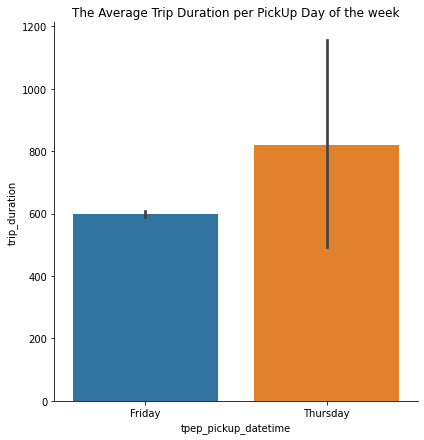

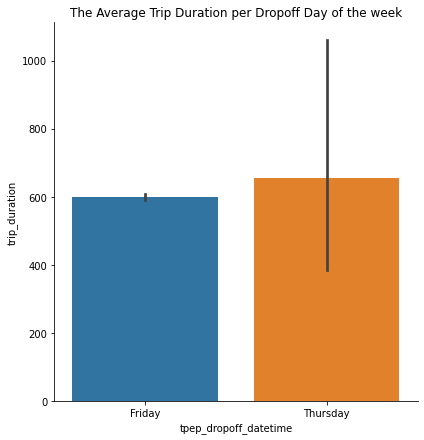

In [162]:

sns.catplot(x="tpep_pickup_datetime",y="trip_duration",kind="bar",data=yellow_results_dayswithout_outliers,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="tpep_dropoff_datetime",y="trip_duration",kind="bar",data=yellow_results_dayswithout_outliers,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')


C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


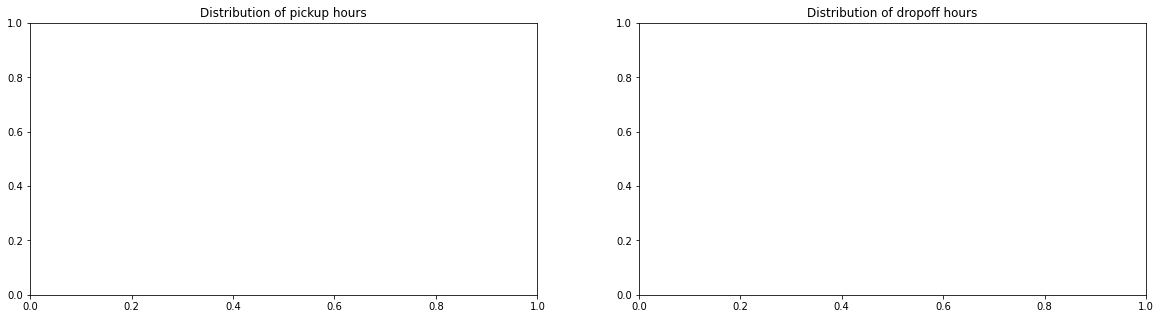

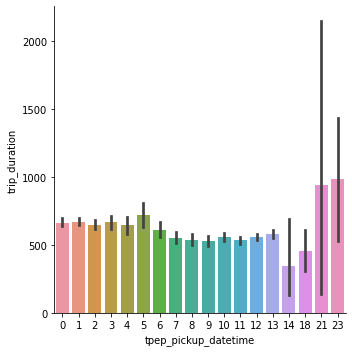

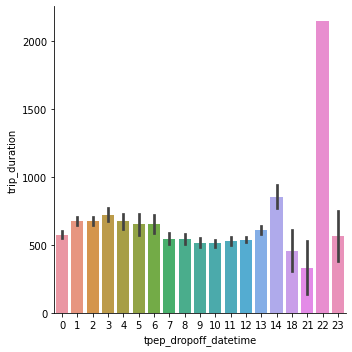

In [163]:
## why double figures toDo <<<

yellow_hours_without_outliers=yellow_results_without_outliers.copy()
yellow_hours_without_outliers['tpep_pickup_datetime']=yellow_results_without_outliers['tpep_pickup_datetime'].dt.hour
yellow_hours_without_outliers['tpep_dropoff_datetime']=yellow_results_without_outliers['tpep_dropoff_datetime'].dt.hour

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Distribution of pickup hours')
ax=sns.catplot(x="tpep_pickup_datetime", y="trip_duration",kind="bar",data=yellow_hours_without_outliers,ax=ax1)
ax2.set_title('Distribution of dropoff hours')
ax=sns.catplot(x="tpep_dropoff_datetime", y="trip_duration",kind="bar",data=yellow_hours_without_outliers,ax=ax2)
plt.show()


The graphs denote the average estimate of a trip for each day of the week. The error bars provides some indication of the uncertainty around that estimate

=> The highest average time taken to complete a trip are for trips started in late evening(starting from 22h) and the least are the ones taken in the early morning(between 7-12 hours)



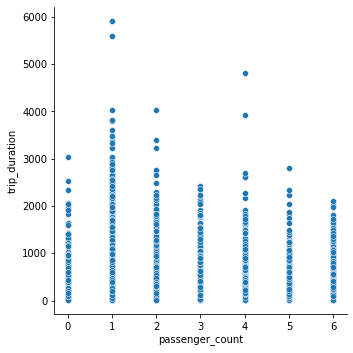

In [164]:
sns.relplot(x="passenger_count", y="trip_duration", data=yellow_hours_without_outliers, kind="scatter")


Here we see, passenger count has no such relationship with trip duration. But it is noted that there are no long trips taken by higher passengers counts like 5-6.
